In [79]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro

In [80]:

# Loading pandas
import pandas as pd

# Loading date wrangling package
from datetime import datetime
# Reading the input data
d = pd.read_csv('./data/data.csv')
print(d)
# Formating to datetime
d['bms_pcs_0_updateTime'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in d['bms_pcs_0_updateTime']]
# Making sure there are no duplicated data
# If there are some duplicates we average the data during those duplicated days
d = d.groupby('bms_pcs_0_updateTime', as_index=False)['bms_pcs_0_acChargeTotal'].mean()

# Sorting the values
d.sort_values('bms_pcs_0_updateTime', inplace=True)

      bms_dateAt  bms_datetimeAt  bms_mcno  bms_pcs_0_acChargeDayTotal  \
0         211101    211101000100     10001                           0   
1         211101    211101000200     10001                           0   
2         211101    211101000300     10001                           0   
3         211101    211101000400     10001                           0   
4         211101    211101000500     10001                           0   
...          ...             ...       ...                         ...   
1432      211101    211101235500     10001                         184   
1433      211101    211101235600     10001                         184   
1434      211101    211101235700     10001                         184   
1435      211101    211101235800     10001                         184   
1436      211101    211101235900     10001                         184   

      bms_pcs_0_acChargeTotal  bms_pcs_0_acDischargeDayTotal  \
0                      201422                  

In [90]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('dark')

data = pd.read_csv('./data/data.csv', index_col=0, parse_dates=[0])

#set the index to datetime
data.index = pd.to_datetime(data.index, utc=True)
#analyze 2015 to 2018 data inclusive
data = data[:]
print(data.columns)


Index(['bms_datetimeAt', 'bms_mcno', 'bms_pcs_0_acChargeDayTotal',
       'bms_pcs_0_acChargeTotal', 'bms_pcs_0_acDischargeDayTotal',
       'bms_pcs_0_acDischargeTotal', 'bms_pcs_0_activeKw',
       'bms_pcs_0_aroundTemp', 'bms_pcs_0_batSOC', 'bms_pcs_0_chargeActiveKw',
       'bms_pcs_0_dcChargeDayTotal', 'bms_pcs_0_dcChargeTotal',
       'bms_pcs_0_dcDischargeDayTotal', 'bms_pcs_0_dcDischargeTotal',
       'bms_pcs_0_dcKw', 'bms_pcs_0_dischargeActiveKw', 'bms_pcs_0_gridAR',
       'bms_pcs_0_gridAS', 'bms_pcs_0_gridAT', 'bms_pcs_0_gridFreq',
       'bms_pcs_0_gridLineVRS', 'bms_pcs_0_gridLineVST',
       'bms_pcs_0_gridLineVTR', 'bms_pcs_0_gridVR', 'bms_pcs_0_gridVS',
       'bms_pcs_0_gridVT', 'bms_pcs_0_igbtTemps_0_igbtno',
       'bms_pcs_0_igbtTemps_0_temp', 'bms_pcs_0_igbtTemps_1_igbtno',
       'bms_pcs_0_igbtTemps_1_temp', 'bms_pcs_0_igbtTemps_2_igbtno',
       'bms_pcs_0_igbtTemps_2_temp', 'bms_pcs_0_igbtTemps_3_igbtno',
       'bms_pcs_0_igbtTemps_3_temp', 'bms_pcs_0_igbtTe

In [91]:
load = data['bms_pcs_0_acChargeTotal']
forecast = data['bms_pcs_0_acDischargeTotal']
load.head(), forecast.head()

print(load)
print(forecast)

bms_dateAt
2001-11-21 00:00:00+00:00    201422
2001-11-21 00:00:00+00:00    201422
2001-11-21 00:00:00+00:00    201422
2001-11-21 00:00:00+00:00    201422
2001-11-21 00:00:00+00:00    201422
                              ...  
2001-11-21 00:00:00+00:00    201606
2001-11-21 00:00:00+00:00    201606
2001-11-21 00:00:00+00:00    201606
2001-11-21 00:00:00+00:00    201606
2001-11-21 00:00:00+00:00    201606
Name: bms_pcs_0_acChargeTotal, Length: 1437, dtype: int64
bms_dateAt
2001-11-21 00:00:00+00:00    188280
2001-11-21 00:00:00+00:00    188280
2001-11-21 00:00:00+00:00    188280
2001-11-21 00:00:00+00:00    188280
2001-11-21 00:00:00+00:00    188280
                              ...  
2001-11-21 00:00:00+00:00    188452
2001-11-21 00:00:00+00:00    188452
2001-11-21 00:00:00+00:00    188452
2001-11-21 00:00:00+00:00    188452
2001-11-21 00:00:00+00:00    188452
Name: bms_pcs_0_acDischargeTotal, Length: 1437, dtype: int64


In [92]:
df_demand = pd.concat([load, forecast], axis=1)
df_demand.columns = ['load', 'forecast']
df_demand.describe()

,load,forecast
count,1437.000000,1437.000000
mean,201514.774530,188311.035491
std,86.877964,59.058674
min,201422.000000,188280.000000
25%,201422.000000,188280.000000
50%,201526.000000,188280.000000
75%,201606.000000,188299.000000
max,201606.000000,188452.000000


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


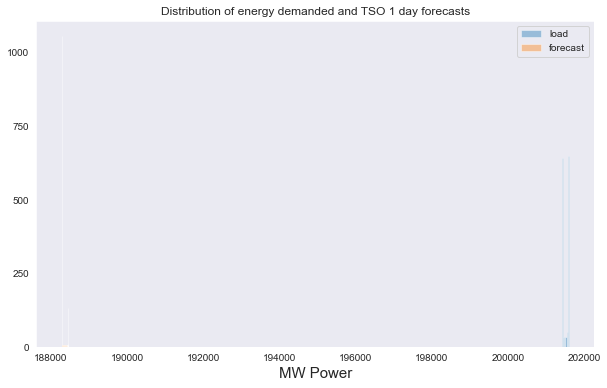

In [99]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df_demand['load'].dropna(), ax=ax, kde=False).set_title('load', fontsize=16)
sns.distplot(df_demand['forecast'].dropna(), ax=ax, kde=False).set_title('forecast', fontsize=16)
plt.xlabel('MW Power', fontsize=15)
plt.legend(['load', 'forecast'])
ax.set_yticks(np.linspace(0, 1000,5))
plt.title('Distribution of energy demanded and TSO 1 day forecasts')
plt.show()

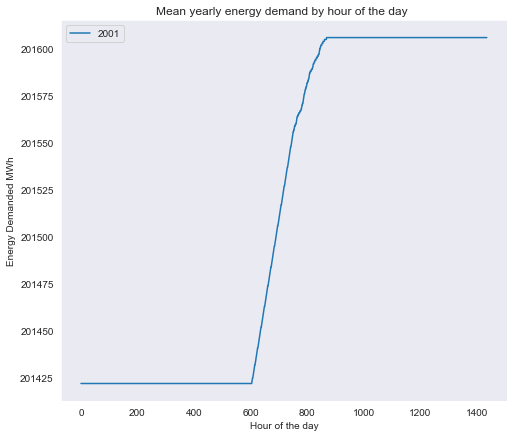

In [100]:
group_hours = df_demand['load'].groupby(pd.Grouper(freq='D', how='mean'))

fig, axs = plt.subplots(1,1, figsize=(8,7))

year_demands = pd.DataFrame()
    
for name, group in group_hours:
    year_demands[name.year] = pd.Series(group.values)
    
year_demands.plot(ax=axs)
axs.set_xlabel('Hour of the day')
axs.set_ylabel('Energy Demanded MWh')
axs.set_title('Mean yearly energy demand by hour of the day ');

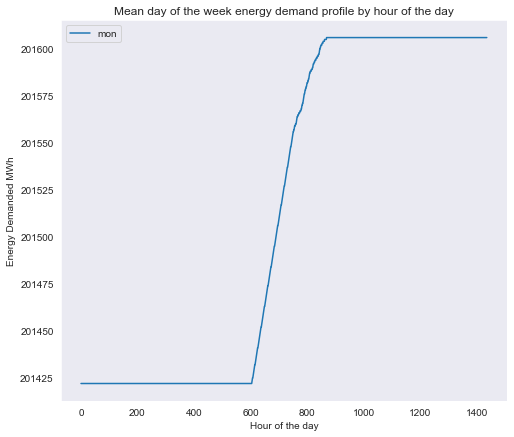

In [103]:
group_hours = df_demand['load'].groupby(pd.Grouper(freq='D', how='mean'))

#day_names = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
day_names = ['mon']


fig, axs = plt.subplots(1,1, figsize=(8,7))

df = pd.DataFrame()
    
for name, group in group_hours:
    df[name.dayofweek] = pd.Series(group.values)
df = df.reindex(sorted(df.columns), axis=1)
df.columns = day_names
df.plot(ax=axs)
axs.set_xlabel('Hour of the day')
axs.set_ylabel('Energy Demanded MWh')
axs.set_title('Mean day of the week energy demand profile by hour of the day');

In [74]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('dark')

#import the dataset
data = pd.read_csv('./data/energy_dataset.csv',
                   index_col=0,
                   parse_dates=[0])

#set the index to datetime
data.index = pd.to_datetime(data.index, utc=True)
#analyze 2015 to 2018 data inclusive
data = data['2018-01':'2018-02']
print(data.columns)

load = data['total load actual']
forecast = data['total load forecast']
load.head(), forecast.head()
df_demand = pd.concat([load, forecast], axis=1)
df_demand.columns = ['load', 'forecast']
df_demand.describe()

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')


,load,forecast
count,1416.000000,1416.000000
mean,29976.891243,29988.644774
std,5026.866698,5014.299160
min,18688.000000,18105.000000
25%,25574.750000,25561.750000
50%,29968.000000,30011.000000
75%,34550.000000,34435.500000
max,39378.000000,39316.000000


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


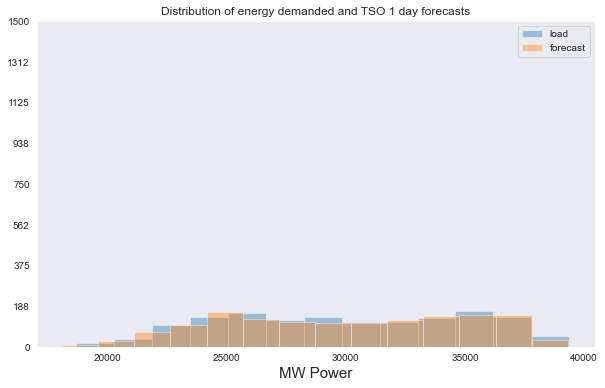

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df_demand['load'].dropna(), ax=ax, kde=False).set_title('load', fontsize=16)
sns.distplot(df_demand['forecast'].dropna(), ax=ax, kde=False).set_title('forecast', fontsize=16)
plt.xlabel('MW Power', fontsize=15)
plt.legend(['load', 'forecast'])
ax.set_yticks(np.linspace(0, 1500, 9))
plt.title('Distribution of energy demanded and TSO 1 day forecasts')
plt.show()

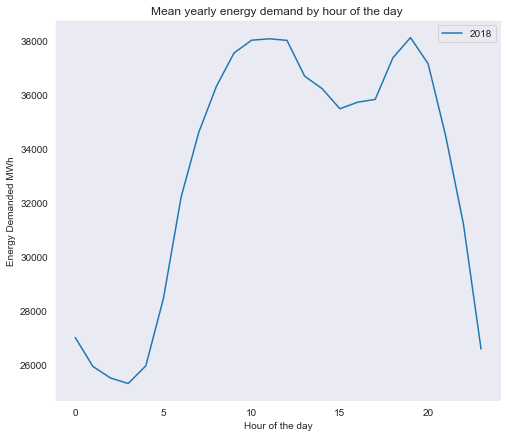

In [76]:
group_hours = df_demand['load'].groupby(pd.Grouper(freq='D', how='mean'))

fig, axs = plt.subplots(1,1, figsize=(8,7))

year_demands = pd.DataFrame()
    
for name, group in group_hours:
    year_demands[name.year] = pd.Series(group.values)
    
year_demands.plot(ax=axs)
axs.set_xlabel('Hour of the day')
axs.set_ylabel('Energy Demanded MWh')
axs.set_title('Mean yearly energy demand by hour of the day ');

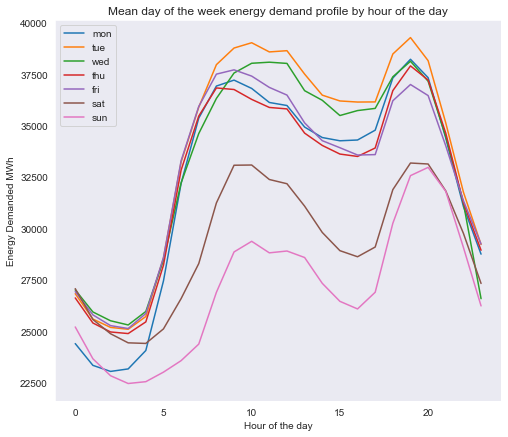

In [77]:
group_hours = df_demand['load'].groupby(pd.Grouper(freq='D', how='mean'))

day_names = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

fig, axs = plt.subplots(1,1, figsize=(8,7))

df = pd.DataFrame()
    
for name, group in group_hours:
    df[name.dayofweek] = pd.Series(group.values)
df = df.reindex(sorted(df.columns), axis=1)
df.columns = day_names
df.plot(ax=axs)
axs.set_xlabel('Hour of the day')
axs.set_ylabel('Energy Demanded MWh')
axs.set_title('Mean day of the week energy demand profile by hour of the day');
